### 시각화전력
- 시각화의 목표 : USD/KRW 환율, 국제 금 값, 코스피 지수의 관계
- 시각화의 범위 : 2013~2022 1년 평균 종가 기준
- 시각화의 개발절차 : www.investing.com에서 2013년도 부터 2022년도 까지의 데이터를 USD/KRW 환율, 국제 금 값, 코스피 지수의 데이터를 합침

### 시각화 요구사항
- 사용자수준 / 취향 / 목적 : 인플레이션이 치솟는 이 시대에서 어떻게 투자를 해야할까 고민하는 성인
- 시나리오 : 스토리보드 개발 : USD/KRW 환율과,코스피 지수, 국제 금 값의 관계를 알고싶고, 달러 투자, 코스피, 금 중에 어느것이 가장 수익률이 좋은가.
- 누적합 : pandas.Series.cumsum

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용 : 년도 별 linespot, 상관관계를 알기 위해 scatterplot,

### 시각화 명세서 기반 설계
- 시각화 UI 설계

In [1]:
# 필요 라이브러리
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# 한글 글꼴 넣어주기
current_font_list = matplotlib.rcParams['font.family']
font_path = "C:\Windows\Fonts\gulim.ttc"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [2]:
GD_data = pd.read_csv('../금 선물 내역.csv')
ER_data = pd.read_csv('../USD_KRW 내역.csv')
KP_data = pd.read_csv('../코스피지수 내역.csv')

In [ ]:
def normal(pd_data,x):
    min_x = pd_data[x].min()
    max_x = pd_data[x].max()
    pd_data[x+'_norm'] = pd_data[x].apply(lambda x :(x-min_x)/(max_x-min_x))
    return pd_data[x+'_norm']

def std(pd_data,x):
    x_mean = pd_data[x].mean()
    x_std = pd_data[x].std()
    pd_data[x+'_std'] = pd_data[x].apply(lambda x: (x-x_mean)/x_std)
    return pd_data[x+'_std']

In [3]:
datalist = [GD_data,ER_data,KP_data]
for i in datalist:
    for j,v in enumerate(i['날짜']):
        i['날짜'][j] = v.split('-')[0]

C:\Users\ITPS\AppData\Local\Temp\ipykernel_8736\272338915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['날짜'][j] = v.split('-')[0]


In [4]:
def myfn(x):
    try:
        if ',' in x:
            return x.replace(',','')
        else:
            return x
    except:
        return '0'
def myfn2(x):
    return x.apply(myfn)

GD_data = GD_data.apply(myfn2)
ER_data = ER_data.apply(myfn2)
KP_data = KP_data.apply(myfn2)

In [19]:
GD_data['종가'] = GD_data['종가'].astype(np.float64)
ER_data['종가'] = ER_data['종가'].astype(np.float64)
KP_data['종가'] = KP_data['종가'].astype(np.float64)

g1=GD_data.groupby('날짜').mean()
g2=ER_data.groupby('날짜').mean()
g3=KP_data.groupby('날짜').mean()

g1.name = '국제금값시세'
g2.name = 'USD/KRW환율'
g3.name = 'KOSPI지수'

국제금값시세


C:\Users\ITPS\AppData\Local\Temp\ipykernel_8736\2418050625.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g1=GD_data.groupby('날짜').mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8736\2418050625.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g2=ER_data.groupby('날짜').mean()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_8736\2418050625.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g3=KP_data.groupby('날짜')

In [25]:
df_combined = pd.concat((s1,s2,s3),axis =1)
df_combined.columns = ['국제금값시세','USD/KRW환율','KOSPI지수']
df_combined=df_combined.reset_index()

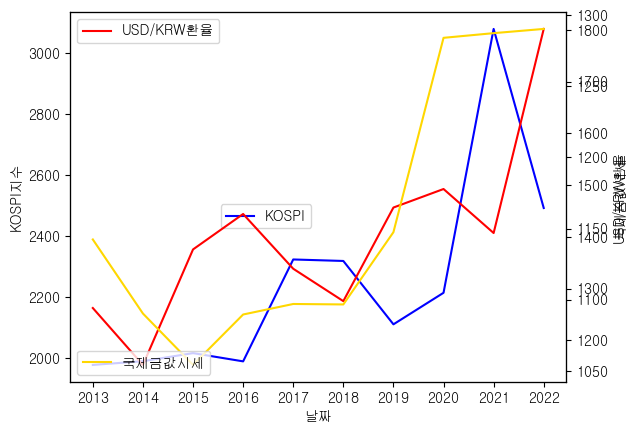

In [54]:
fig1 = plt.figure()
a=fig1.add_subplot()

a2 = a.twinx()
a3 = a.twinx()
sns.lineplot(data=df_combined,x='날짜',y='KOSPI지수',ax=a,label = 'KOSPI',color='blue')
sns.lineplot(data=df_combined,x=np.arange(10),y='USD/KRW환율',ax=a2,label='USD/KRW환율',color='red')
sns.lineplot(data=df_combined,x=np.arange(10),y='국제금값시세',ax=a3,label='국제금값시세',color='gold')

a.legend(bbox_to_anchor=(0.5,0.5))
a2.legend(loc=2)
a3.legend(loc=3)

# sns.lineplot(data=df_combined,x='날짜',y='USD/KRW환율',ax=a,label = '환율',color = 'green')
# sns.lineplot(data=df_combined,x='날짜',y='KOSPI지수',ax=a, label = 'KOSPI',color ='blue')